## **ANEXO CLUSTERING - IEV-II**

Hay tres enfoques diferentes para aprendizaje automático, según los datos que tengas. Puedes optar por el aprendizaje supervisado, el aprendizaje semi-supervisado o el aprendizaje no supervisado.

En el aprendizaje supervisado, tienes datos etiquetados, por lo que tienes salidas para las que sabes con certeza cuáles son los valores correctos para sus entradas. Es como saber los precios de los automóviles en función de características como marca, modelo, estilo, transmisión y otros atributos.

Con el aprendizaje semi-supervisado, tienes un gran conjunto de datos donde algunos de los datos están etiquetados pero la mayoría no.

Esto cubre una gran cantidad de datos del mundo real porque puede resultar costoso conseguir que un experto etiquete cada uno de los datos. Puedes solucionar este problema utilizando una combinación de aprendizaje supervisado y no supervisado.

El aprendizaje no supervisado significa que tienes un conjunto de datos sin ninguna etiqueta. No sabes si hay patrones ocultos en los datos, así que dejas que el algoritmo encuentre todo lo que pueda.

Ahí es donde entran en juego los algoritmos de agrupamiento. Es uno de los métodos que puedes utilizar en un problema de aprendizaje no supervisado.

¿Qué son los algoritmos de agrupamiento?

El agrupamiento es una tarea de aprendizaje automático no supervisada. Es posible que también lo hayas escuchado como análisis de agrupación debido a la forma en que funciona este método.

El uso de un algoritmo de agrupamiento significa que le darás al algoritmo una gran cantidad de datos de entrada sin etiquetas y te permitirá encontrar cualquier agrupación en los datos que se pueda.

Esas agrupaciones se denominan agrupaciones. Una agrupación es un grupo de datos que son similares entre sí en función de su relación con los datos circundantes. El agrupamiento se utiliza para cosas tales como la ingeniería de características o el descubrimiento de patrones.

Cuando empiezas con datos de los que no sabes nada, el agrupamiento puede ser un buen punto de partida para obtener información.

**Tipos de algoritmos de agrupamiento**

Existen diferentes tipos de algoritmos de agrupamiento que manejan todo tipo de datos únicos.

**Basado en densidad:**

En el agrupamiento basado en densidad, los datos se agrupan por áreas de altas concentraciones de puntos de datos rodeadas por áreas de bajas concentraciones de puntos de datos. Básicamente, el algoritmo encuentra los lugares que son densos en puntos de datos y los llama grupos.

Lo bueno de esto es que los grupos pueden tener cualquier forma. No estás limitado a condiciones esperadas.

Los algoritmos de agrupamiento de este tipo no tienen en cuenta los valores atípicos en los grupos, por lo que se ignoran.

**Basado en la distribución:**

Con un enfoque de agrupamiento basado en la distribución, se considera que todos los puntos de datos forman parte de un grupo según la probabilidad de que un punto pertenezca a un grupo determinado.‌‌

Funciona así: hay un punto central y, a medida que aumenta la distancia de un punto de datos desde el centro, la probabilidad de que forme parte de ese grupo disminuye.

‌‌Si no estás seguro de cuál podría ser la distribución de tus datos, deberías considerar un tipo diferente de algoritmo.

**Basado en Centroides:**

El agrupamiento basado en centroides es la que probablemente has escuchado más. Es algo sensible a los parámetros iniciales que le das, pero es rápida y eficiente.

Estos tipos de algoritmos separan puntos de datos en función de múltiples centroides en los datos. Cada punto de datos se asigna a un grupo en función de su distancia al cuadrado del centroide. Este es el tipo de agrupación más utilizado.

**Basado en Jerarquías:**

El agrupamiento basado en jerarquías se utiliza normalmente en datos jerárquicos, como los que obtendrías de la base de datos de una empresa o de taxonomías. Construye un árbol de grupos para que todo esté organizado de arriba hacia abajo.

Esto es más restrictivo que los otros tipos de agrupamiento, pero es perfecto para tipos específicos de conjuntos de datos.

**Cuando usar agrupamiento:**

Cuando tienes un conjunto de datos sin etiquetar, es muy probable que utilices algún tipo de algoritmo de aprendizaje sin supervisión.

Hay muchas técnicas diferentes de aprendizaje no supervisado, como redes neuronales, aprendizaje por refuerzo y agrupamiento. El tipo específico de algoritmo que quieres utilizar dependerá de cómo se vean tus datos.

Es posible que quieras utilizar agrupamiento cuando intentas detectar anomalías para encontrar valores atípicos en tus datos. El agrupamiento ayuda a encontrar esos grupos y muestra los límites que determinarían si un punto de datos es un valor atípico o no.

Si no estás seguro de qué características usar para tu modelo de aprendizaje automático, el agrupamiento descubre patrones que puedes usar para descubrir qué se destaca en los datos.

El agrupamiento es especialmente útil para explorar datos de los que no sabes nada. Puede llevar algún tiempo averiguar qué tipo de algoritmo de agrupamiento funciona mejor, pero cuando lo hagas, obtendrás información invaluable sobre tus datos. Es posible que encuentres conexiones en las que nunca hubieras pensado.

Algunas aplicaciones del mundo real del agrupamiento incluyen la detección de fraudes en seguros, la categorización de libros en una biblioteca y la segmentación de clientes en mercadeo. También se puede utilizar en problemas más grandes, como análisis de terremotos o planificación urbana.

Ahora que tienes algunos antecedentes sobre cómo funcionan los algoritmos de agrupamiento y los diferentes tipos disponibles, podemos hablar sobre los algoritmos que verás comúnmente en la práctica.

Implementaremos estos algoritmos en un conjunto de datos de ejemplo de la biblioteca sklearn en Python.

Usaremos el conjunto de datos make_classification de la biblioteca sklearn para demostrar cómo los diferentes algoritmos de agrupamiento no son adecuados para todos los problemas de agrupamiento.


La librería de Python "scikit-learn" ofrece implementaciones eficientes de varias técnicas de agrupamiento. Esta comparativa muestra cómo distintos algoritmos se comportan con varios tipos de datos, todos en un mismo gráfico:

Automatically created module for IPython interactive environment


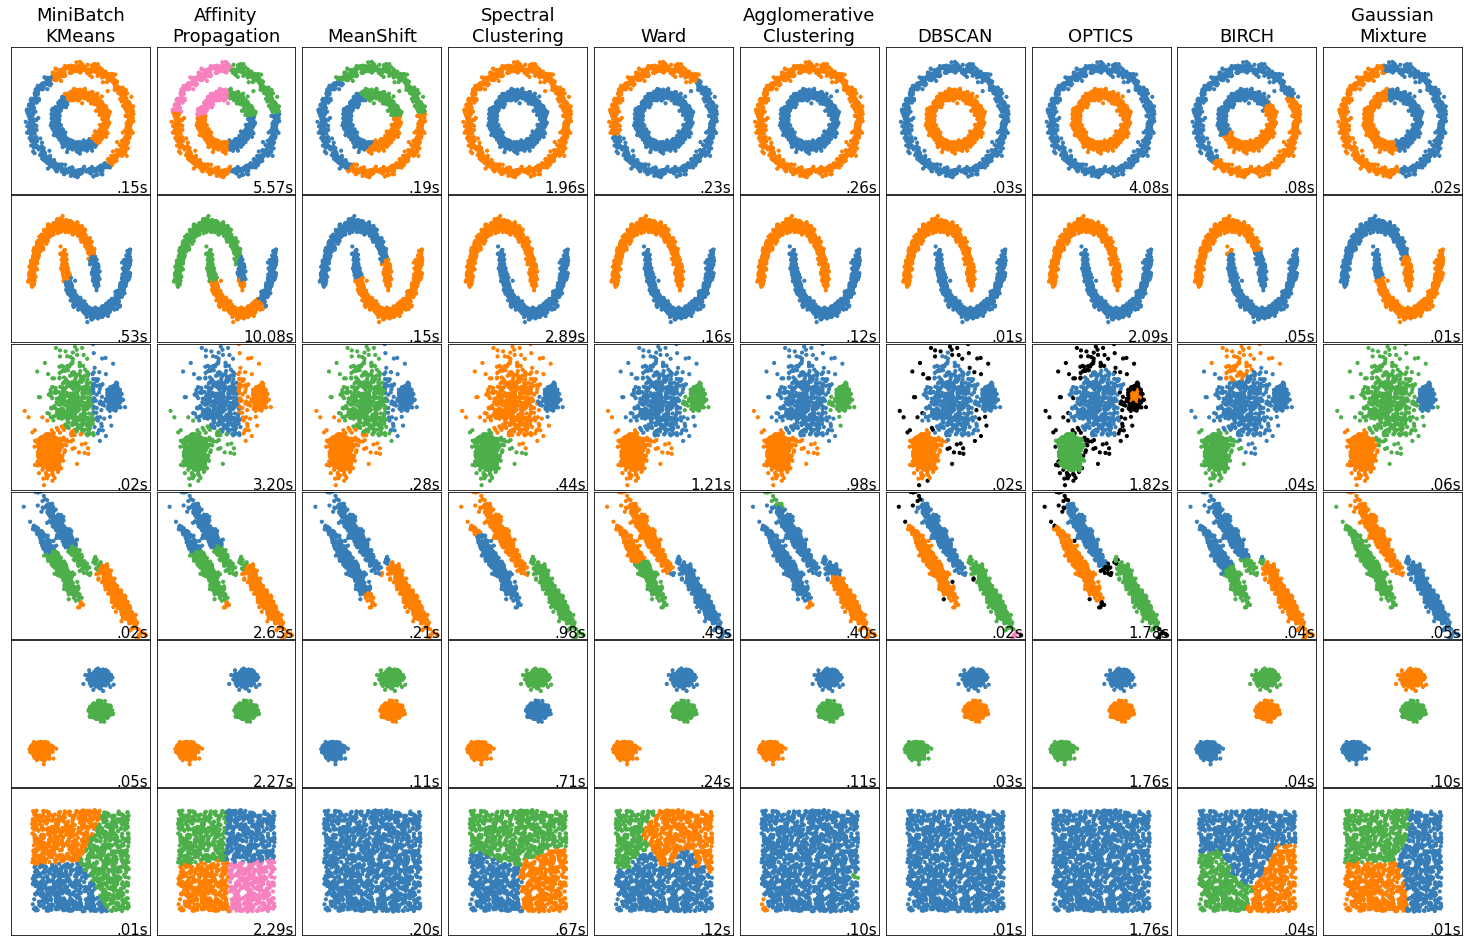

In [1]:
print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.95, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatch\nKMeans', two_means),
        ('Affinity\nPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('Spectral\nClustering', spectral),
        ('Ward', ward),
        ('Agglomerative\nClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
        ('BIRCH', birch),
        ('Gaussian\nMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

### **Ahora mostraremos los principales algoritmos de clustering y ejemplos de su implementacion en Python:**

### **K-MEANS:**

El agrupamiento de K-means es el algoritmo de agrupamiento más utilizado. Es un algoritmo basado en centroides y es el algoritmo de aprendizaje no supervisado más simple.

Este algoritmo intenta minimizar la varianza de los puntos de datos dentro de un grupo. También es la forma en que la mayoría de las personas se familiarizan con el aprendizaje automático sin supervisión.

K-means se usa mejor en conjuntos de datos más pequeños porque itera sobre todos los puntos de datos. Eso significa que tomará más tiempo clasificar los puntos de datos si hay una gran cantidad de ellos en el conjunto de datos.

Dado que así es como k-means agrupa los puntos de datos, no se escala bien.

(array([ 11,  12,  14,  17,  18,  19,  23,  25,  37,  39,  41,  42,  43,
        49,  51,  53,  64,  67,  68,  76,  87,  90,  96,  97,  98, 103,
       106, 107, 112, 120, 123, 128, 134, 135, 143, 144, 146, 153, 162,
       167, 177, 179, 191, 194, 195, 196, 203, 205, 209, 210, 219, 221,
       224, 225, 229, 232, 234, 237, 239, 240, 241, 252, 254, 256, 257,
       258, 262, 264, 269, 271, 274, 277, 280, 281, 282, 283, 290, 291,
       294, 295, 298, 300, 308, 313, 315, 322, 333, 335, 340, 341, 344,
       347, 349, 351, 355, 356, 357, 361, 363, 364, 372, 374, 376, 377,
       381, 383, 385, 386, 387, 390, 394, 396, 398, 400, 401, 404, 409,
       414, 420, 422, 439, 442, 451, 453, 459, 460, 461, 466, 473, 474,
       475, 496, 498, 505, 512, 513, 516, 518, 519, 532, 536, 546, 547,
       550, 556, 566, 576, 579, 580, 583, 584, 585, 587, 589, 596, 599,
       600, 611, 613, 614, 619, 621, 629, 630, 633, 635, 639, 641, 643,
       644, 646, 647, 650, 652, 657, 664, 671, 678, 680, 693, 6

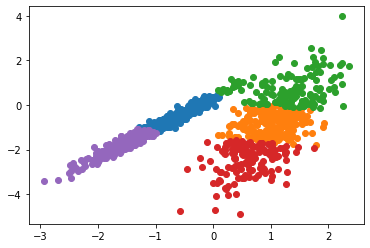

In [ ]:
# K-MEANS:
# Importamos las librerias necesarias:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans

# Inicializar el conjunto de datos con el que trabajaremos:
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# Definir el modelo y cantidad de clusters:
kmeans_model = KMeans(n_clusters=5)

# Entrenar el modelo:
kmeans_model.fit(training_data)

# Asignar cada punto de datos a un grupo:
kmeans_result = kmeans_model.predict(training_data)

# Obtener todos los grupos únicos:
kmeans_clusters = unique(kmeans_result)

# Graficar los grupos KMeans:
for kmeans_cluster in kmeans_clusters:
    # get data points that fall in this cluster
    index = where(kmeans_result == kmeans_cluster)
    # make the plot
    pyplot.scatter(training_data[index, 0], training_data[index, 1])
    print(index)

# Mostrar el gráfico K-means
pyplot.show()

### **K-MEDOIDS:**

Este es un método de clustering muy similar a K-means en cuanto a que ambos agrupan las observaciones en K clusters, donde K es un valor preestablecido por el analista. La diferencia es que, en K-medoids, cada cluster está representado por una observación presente en el cluster (medoid), mientras que en K-means cada cluster está representado por su centroide, que se corresponde con el promedio de todas las observaciones del cluster pero con ninguna en particular.

Una definición más exacta del término medoid es: elemento dentro de un cluster cuya distancia (diferencia) promedio entre él y todos los demás elementos del mismo cluster es lo menor posible. Se corresponde con el elemento más central del cluster y por lo tanto puede considerarse como el más representativo. El hecho de utilizar medoids en lugar de centroides hace de K-medoids un método más robusto que K-means, viéndose menos afectado por outliers o ruido. A modo de idea intuitiva puede considerarse como la analogía entre media y mediana.

El algoritmo más empleado para aplicar K-medoids se conoce como PAM (Partitioning Around Medoids) y sigue los siguientes pasos:

- Seleccionar K observaciones aleatorias como medoids iniciales. También es posible identificarlas de forma específica.

- Calcular la matriz de distancia entre todas las observaciones si esta no se ha calculado anteriormente.

- Asignar cada observación a su medoid más cercano.

- Para cada uno de los clusters creados, comprobar si seleccionando otra observación como medoid se consigue reducir la distancia promedio del cluster, si esto ocurre, seleccionar la observación que consigue una mayor reducción como nuevo medoid.

- Si al menos un medoid ha cambiado en el paso 4, volver al paso 3, de lo contrario, se termina el proceso.

A diferencia del algoritmo K-means, en el que se minimiza la suma total de cuadrados intra-cluster (suma de las distancias al cuadrado de cada observación respecto a su centroide), el algoritmo K-medoids minimiza la suma de las diferencias de cada observación respecto a su medoid.

Por lo general, el método de K-medoids se utiliza cuando se conoce o se sospecha de la presencia de outliers. Si esto ocurre, es recomendable utilizar como medida de similitud la distancia de Manhattan, ya que es menos sensible a outliers que la euclídea.

Ventajas y desventajas


- K-medoids es un método de clustering más robusto que K-means, por lo es más adecuado cuando el set de datos contiene outliers o ruido.

- Al igual que K-means, necesita que se especifique de antemano el número de clusters que se van a crear. Esto puede ser complicado de determinar si no se dispone de información adicional sobre los datos. Muchas de las estrategias empleadas en K-means para identificar el número óptimo, pueden aplicarse en K-medoids.

- Para sets de datos grandes se necesitan muchos recursos computacionales. En tal situación se recomienda aplicar el método CLARA. 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


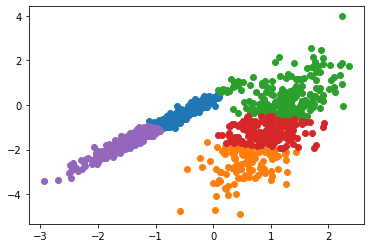

In [ ]:
# K-MEDOIDS:
# Importamos las librerias necesarias:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

# Inicializar el conjunto de datos con el que trabajaremos:
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# Definir el modelo y cantidad de clusters:
kmedoids_model = KMedoids(n_clusters=5)

# Asignar cada punto de datos a un grupo:
kmedoids_result = kmedoids_model.fit_predict(training_data)

# Obtener todos los grupos únicos:
kmedoids_clusters = unique(kmedoids_result)

# Graficar los grupos de K-Medoids:
for kmedoids_cluster in kmedoids_clusters:
    # Obtener todos los puntos de datos que caen en este grupo:
    index = where(kmedoids_result == kmedoids_cluster)
    # Hacer el gráfico:
    pyplot.scatter(training_data[index, 0], training_data[index, 1])

# Mostrar el gráfico de K-Medoids:
pyplot.show()

### **Agglomerative Hierarchical clustering:**

Este es el tipo más común de algoritmo de agrupamiento jerárquico. Se utiliza para agrupar objetos en grupos en función de su similitud entre sí.

Esta es una forma de agrupamiento de abajo hacia arriba, donde cada punto de datos se asigna a su propio grupo. Luego, esos grupos se unen.

En cada iteración, los grupos similares se fusionan hasta que todos los puntos de datos forman parte de un gran grupo raíz.

La agrupación aglomerativa es mejor para encontrar agrupaciones pequeñas. El resultado final parece un dendrograma para que puedas visualizar fácilmente los grupos cuando el algoritmo termina.

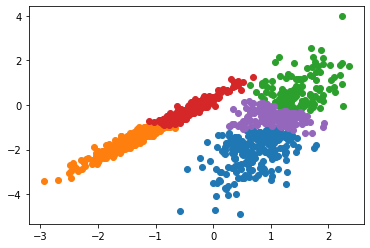

In [ ]:
# Agglomerative Hierarchical Clustering:
# Importamos las librerias necesarias:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering

# Inicializar el conjunto de datos con el que trabajaremos:
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# Definir el modelo y cantidad de clusters:
agglomerative_model = AgglomerativeClustering(n_clusters=5)

# Asignar cada punto de datos a un grupo:
agglomerative_result = agglomerative_model.fit_predict(training_data)

# Obtener todos los grupos únicos:
agglomerative_clusters = unique(agglomerative_result)

# Graficar los grupos:
for agglomerative_cluster in agglomerative_clusters:
    # Obtener todos los puntos de datos que caen en este grupo:
    index = where(agglomerative_result == agglomerative_cluster)
    # Hacer el gráfico:
    pyplot.scatter(training_data[index, 0], training_data[index, 1])

# Mostrar el gráfico de Jerarquía Aglomerativa
pyplot.show()

### **Algoritmo OPTICS:**

OPTICS significa Ordenar Puntos para Identificar la Estructura de Agrupamiento ú Ordering Points to Identify the Clustering Structure por sus siglas en inglés. Es un algoritmo basado en densidad similar a DBSCAN, pero es mejor porque puede encontrar agrupaciones significativas en datos que varían en densidad. Lo hace ordenando los puntos de datos de modo que los puntos más cercanos sean vecinos en el ordenamiento.

Esto facilita la detección de diferentes grupos de densidad. El algoritmo OPTICS solo procesa cada punto de datos una vez, similar a DBSCAN (aunque se ejecuta más lento que DBSCAN). También hay una distancia especial almacenada para cada punto de datos que indica que un punto pertenece a un grupo específico.

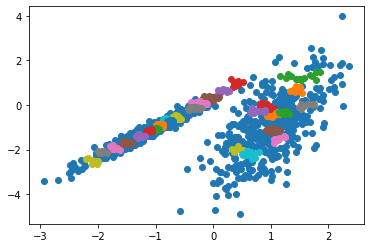

In [ ]:
# Algoritmo OPTICS:
# Importamos las librerias necesarias:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS

# Inicializar el conjunto de datos con el que trabajaremos:
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# Definir el modelo:
optics_model = OPTICS(eps=0.55, min_samples=8)

# Asignar cada punto de datos a un grupo:
optics_result = optics_model.fit_predict(training_data)

# Obtener todos los grupos únicos:
optics_clusters = unique(optics_result)

# Graficar los grupos OPTICS:
for optics_cluster in optics_clusters:
    # Obtener todos los puntos de datos que caen en este grupo:
    index = where(optics_result == optics_cluster)
    # Hacer el gráfico:
    pyplot.scatter(training_data[index, 0], training_data[index, 1])

# Mostrar el gráfico OPTICS:
pyplot.show()

### **Algoritmo BIRCH:**

El algoritmo de Equilibrio Iterativo de Reducción y Agrupación mediante Jerarquías o Balance Iterative Reducing and Clustering using Hierarchies (BIRCH) por sus siglas en inglés, funciona mejor en  grandes conjuntos de datos que el algoritmo k-means.

Divide los datos en pequeños resúmenes que se agrupan en lugar de los puntos de datos originales. Los resúmenes contienen tanta información sobre la distribución de los puntos de datos como sea posible.

Este algoritmo se usa comúnmente con otros algoritmos de agrupamiento porque las otras técnicas de agrupamiento se pueden usar en los resúmenes generados por BIRCH.

La principal desventaja del algoritmo BIRCH es que solo funciona con datos numéricos. No puedes usar BIRCH para valores categóricos a menos que realices algunas transformaciones de datos.

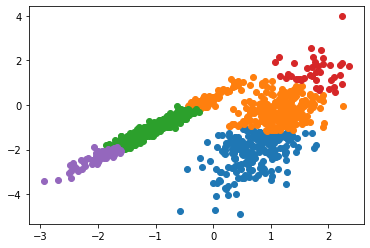

In [ ]:
# Algoritmo BIRCH:
# Importamos las librerias necesarias:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import Birch

# Inicializar el conjunto de datos con el que trabajaremos:
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# Definir el modelo y cantidad de clusters:
birch_model = Birch(threshold=0.03, n_clusters=5)

# Entrenar el modelo:
birch_model.fit(training_data)

# Asignar cada punto de datos a un grupo:
birch_result = birch_model.predict(training_data)

# Obtener todos los grupos únicos:
birch_clusters = unique(birch_result)

# Graficar los grupos BIRCH:
for birch_cluster in birch_clusters:
    # Obtener todos los puntos de datos que caen en este grupo:
    index = where(birch_result == birch_cluster)
    # Hacer el gráfico:
    pyplot.scatter(training_data[index, 0], training_data[index, 1])

# Mostrar el gráfico BIRCH:
pyplot.show()

### **DBSCAN:**

DBSCAN significa agrupamiento espacial basado en densidad de aplicaciones con ruido. Es un algoritmo de agrupamiento basado en densidad, a diferencia de k-means.

Este es un buen algoritmo para encontrar esquemas en un conjunto de datos. Encuentra grupos de forma arbitraria en función de la densidad de puntos de datos en diferentes regiones. Separa las regiones por áreas de baja densidad para poder detectar valores atípicos entre los grupos de alta densidad.

Este algoritmo es mejor que el k-means cuando se trata de trabajar con datos que tienen formas extrañas.

DBSCAN utiliza dos parámetros para determinar cómo se definen los grupos: minPts (el número mínimo de puntos de datos que deben agruparse para que un área se considere de alta densidad) y eps (la distancia utilizada para determinar si un punto de datos está en la misma área que otros puntos de datos).

La elección de los parámetros iniciales adecuados es fundamental para que este algoritmo funcione.

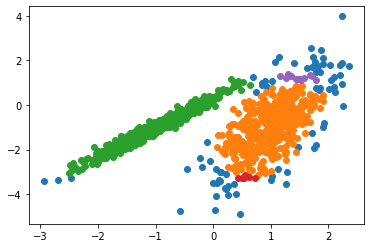

In [ ]:
# DBSCAN:
# Importamos las librerias necesarias:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN

# Inicializar el conjunto de datos con el que trabajaremos:
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# Definir el modelo:
dbscan_model = DBSCAN(eps=0.25, min_samples=9)

# Entrenar el modelo:
dbscan_model.fit(training_data)

# Asignar cada punto de datos a un grupo:
dbscan_result = dbscan_model.fit_predict(training_data)

# Obtener todos los grupos únicos:
dbscan_clusters = unique(dbscan_result)

# Graficar el DBSCAN de grupos:
for dbscan_cluster in dbscan_clusters:
    # Obtener todos los puntos de datos que caen en este grupo:
    index = where(dbscan_result == dbscan_cluster)
    # Hacer el gráfico:
    pyplot.scatter(training_data[index, 0], training_data[index, 1])

# Mostrar el gráfico DBSCAN:
pyplot.show()

### **Gaussian mixture models (GMMs):**

Uno de los problemas con k-means es que los datos deben seguir un formato circular. La forma en que k-means calcula la distancia entre puntos de datos tiene que ver con una ruta circular, por lo que los datos no circulares no se agrupan correctamente.

Este es un problema que corrigen los modelos de mezcla Gaussianos. No necesitas datos con forma circular para que funcione bien. El modelo de mezcla Gaussiana utiliza múltiples distribuciones Gaussianas para ajustar datos que tienen formas arbitrarias.

Hay varios modelos Gaussianos únicos que actúan como capas ocultas en este modelo híbrido. Entonces, el modelo calcula la probabilidad de que un punto de datos pertenezca a una distribución Gaussiana específica y ese es el grupo en el que se ubicará.

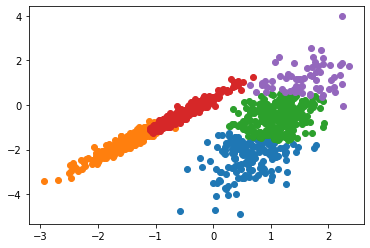

In [ ]:
# Gaussian mixture models (GMMs):
# Importamos las librerias necesarias:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture

# Inicializar el conjunto de datos con el que trabajaremos:
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# Definir el modelo y cantidad de clusters:
gaussian_model = GaussianMixture(n_components=5)

# Entrenar el modelo:
gaussian_model.fit(training_data)

# Asignar cada punto de datos a un grupo:
gaussian_result = gaussian_model.predict(training_data)

# Obtener todos los grupos únicos:
gaussian_clusters = unique(gaussian_result)

# Graficar los grupos de Mezcla Gaussiana:
for gaussian_cluster in gaussian_clusters:
    # Obtener todos los puntos de datos que caen en este grupo:
    index = where(gaussian_result == gaussian_cluster)
    # Hacer el gráfico:
    pyplot.scatter(training_data[index, 0], training_data[index, 1])

# Mostrar el gráfico de Mezcla Gaussiana:
pyplot.show()

### **Affinity Propagation:**

Este algoritmo de agrupamiento es completamente diferente de los demás en la forma en que agrupa los datos.

Cada punto de datos se comunica con todos los demás puntos de datos para que los demás sepan qué tan similares son y eso comienza a revelar los grupos en los datos. No tienes que decirle a este algoritmo cuántos grupos esperar en los parámetros de inicialización.

A medida que se envían mensajes entre puntos de datos, se encuentran conjuntos de datos llamados ejemplares que representan los grupos.

Se encuentra un ejemplar después de que los puntos de datos se hayan transmitido mensajes entre sí y formen un consenso sobre qué punto de datos representa mejor un grupo.

Cuando no estás seguro de cuántos grupos esperar, como en un problema de visión por computadora, este es un gran algoritmo para comenzar.


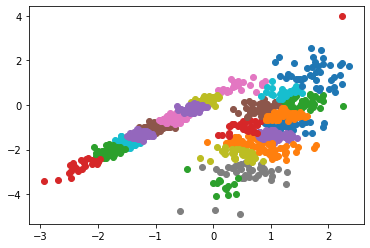

In [ ]:
# Affinity Propagation:
# Importamos las librerias necesarias:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation

# Inicializar el conjunto de datos con el que trabajaremos:
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# Definir el modelo:
affinity_model = AffinityPropagation(damping=0.9)

# Entrenar el modelo:
affinity_model.fit(training_data)

# Asignar cada punto de datos a un grupo:
affinity_result = affinity_model.predict(training_data)

# Obtener todos los grupos únicos:
affinity_clusters = unique(affinity_result)

# Graficar los grupos:
for affinity_cluster in affinity_clusters:
    # Obtener todos los puntos de datos que caen en este grupo:
    index = where(affinity_result == affinity_cluster)
    # Hacer el gráfico:
    pyplot.scatter(training_data[index, 0], training_data[index, 1])

# Mostrar el gráfico de Affinity Propagation:
pyplot.show()

### **Mean-Shift Clustering:**

Este es otro algoritmo que es particularmente útil para manejar imágenes y procesamiento de visión por computadora.

El desplazamiento medio es similar al algoritmo BIRCH porque también encuentra grupos sin que se establezca un número inicial de grupos.

Este es un algoritmo de agrupamiento jerárquico, pero la desventaja es que no escala bien cuando se trabaja con grandes conjuntos de datos.

Funciona iterando sobre todos los puntos de datos y los desplaza hacia la moda. La moda en este contexto es el área de alta densidad de puntos de datos en una región.

Es por eso que es posible que escuches que se hace referencia a este algoritmo como el algoritmo de búsqueda de moda. Cada punto de datos pasará por este proceso iterativo y los moverá más cerca de donde están otros puntos de datos hasta que todos los puntos de datos hayan sido asignados a un grupo.

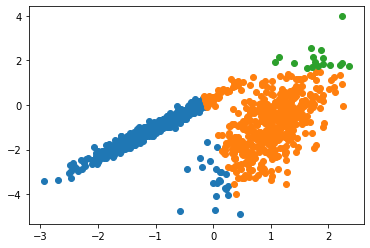

In [ ]:
# Mean-Shift Clustering:
# Importamos las librerias necesarias:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift

# Inicializar el conjunto de datos con el que trabajaremos:
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# Definir el modelo:
mean_model = MeanShift()

# Asignar cada punto de datos a un grupo:
mean_result = mean_model.fit_predict(training_data)

# Obtener todos los grupos únicos:
mean_clusters = unique(mean_result)

# Graficar los grupos de Deszplazamiento Medio:
for mean_cluster in mean_clusters:
    # Obtener todos los puntos de datos que caen en este grupo:
    index = where(mean_result == mean_cluster)
    # Hacer el gráfico:
    pyplot.scatter(training_data[index, 0], training_data[index, 1])

# Mostrar el gráfico de Deszplazamiento Medio:
pyplot.show()

### **Fuzzy C-Means Clustering:**

Este método es uno de los más utilizados en la lògica difusa, es una técnica de minería de datos para el clustering que se basa en el algoritmo clásico C-Means, cuyo objetivo es optimizar el agrupamiento difuso, en el cual, los puntos de datos pueden pertenecer a más de un grupo, y se asocia a cada uno de los puntos un indicador correspondiente al grado en que los puntos de datos pertenecen a los diferentes grupos. En términos generales, el método consiste en minimizar iterativamente la función hasta obtener una partición difusa óptima.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.4.1
    Uninstalling typer-0.4.1:
      Successfully uninstalled typer-0.4.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 6.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=986c74896c0a8fc8987e8c4486156c025357195eee53f4346cd6478ac6c5a265
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


Text(0.5, 1.0, 'Test data: 200 points x3 clusters.')

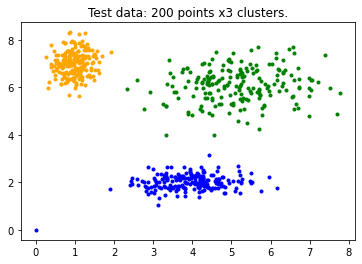

In [ ]:
# Fuzzy C-Means Clustering:
# Importamos las librerias necesarias:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
!pip install fuzzy-c-means
!pip install -U scikit-fuzzy
import skfuzzy as fuzz

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Defina tres centros de conglomerados:
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Defina tres cluster sigmas en x e y, respectivamente:
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generar datos de prueba:
# Establecer semilla para la reproducibilidad
np.random.seed(42)  
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualizar los datos de prueba:
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

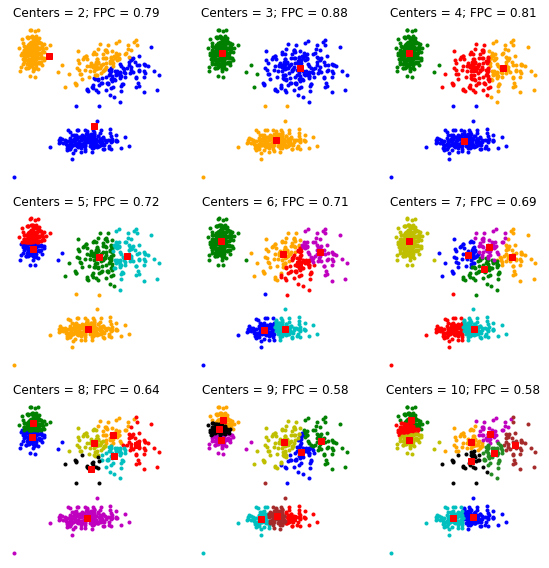

In [ ]:
# Configurar el bucle y dibujar:
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Almacenar valores fpc para más tarde:
    fpcs.append(fpc)

    # Trazar grupos asignados, para cada punto de datos en el conjunto
    # de entrenamiento:
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Marque el centro de cada fuzzy cluster y graficar:
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

### **K-prototypes:**

Es un algoritmo de agrupación restringido, el cual permite agrupar grandes grupos de datos mixtos, numéricos y categóricos. Como el clustering se realiza con base en la comparación de los objetos de K prototipos, en vez de K-medias (means), se le llama k-prototypes.
El aporte que este método hace al método K-means, es permitir el análisis de datos categóricos, preservando su eficiencia.

--------------------------------------------------------

Mas info:
 [Link 1 ](http://www.cs.us.es/~fsancho/?e=230)

--------------------------------------------------------